In [17]:
import numpy as np
import pandas as pd

%matplotlib inline

## Read in Text File from the Source referenced on Data is Plural

In [7]:
txt = pd.read_csv('geoc_inv.txt') # download this from the link provided in readme
# too big to upload to Github easily

/Users/aseemshukla/.pyenv/versions/3.7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
txt.head()

,appln_id,patent_office,filing_date,lat,lng,ctry_code,name_0,name_1,name_2,name_3,name_4,name_5,city,coord_source,source,type
0,1,EP,2000-02-15,61.4431,23.8519,FI,Finland,Western Finland,Pirkanmaa,Tampere,Tampere,NaN,Tampere,geolocalization,1,continual
1,1,EP,2000-02-15,61.4446,23.8719,FI,Finland,Western Finland,Pirkanmaa,Tampere,Tampere,NaN,Tampere,geolocalization,1,continual
2,1,EP,2000-02-15,61.2128,23.7390,FI,Finland,Western Finland,Pirkanmaa,Southern Pirkanmaa,Viiala,NaN,Viiala,geolocalization,1,continual
3,1,EP,2000-02-15,61.4416,23.8659,FI,Finland,Western Finland,Pirkanmaa,Tampere,Tampere,NaN,Tampere,geolocalization,1,continual
4,2,EP,1992-12-02,37.9048,-122.2810,US,United States,California,Contra Costa,NaN,NaN,NaN,Contra Costa,geolocalization,1,continual


In [10]:
txt.shape

(30323209, 16)

## Add a year column for aggregation

In [12]:
txt['year'] = txt.filing_date.str[:4]

In [13]:
txt.head()

,appln_id,patent_office,filing_date,lat,lng,ctry_code,name_0,name_1,name_2,name_3,name_4,name_5,city,coord_source,source,type,year
0,1,EP,2000-02-15,61.4431,23.8519,FI,Finland,Western Finland,Pirkanmaa,Tampere,Tampere,NaN,Tampere,geolocalization,1,continual,2000
1,1,EP,2000-02-15,61.4446,23.8719,FI,Finland,Western Finland,Pirkanmaa,Tampere,Tampere,NaN,Tampere,geolocalization,1,continual,2000
2,1,EP,2000-02-15,61.2128,23.7390,FI,Finland,Western Finland,Pirkanmaa,Southern Pirkanmaa,Viiala,NaN,Viiala,geolocalization,1,continual,2000
3,1,EP,2000-02-15,61.4416,23.8659,FI,Finland,Western Finland,Pirkanmaa,Tampere,Tampere,NaN,Tampere,geolocalization,1,continual,2000
4,2,EP,1992-12-02,37.9048,-122.2810,US,United States,California,Contra Costa,NaN,NaN,NaN,Contra Costa,geolocalization,1,continual,1992


## Do we really need all these European countries? Look at distribution of patents between them

In [30]:
eur = ['Andorra','Austria','Belgium','Denmark','Finland','Greece','Iceland','Ireland','Isle of Man',\
           'Jersey','Liechtenstein','Luxembourg','Malta','Monaco','Norway','Portugal','Åland','Switzerland',\
           'San Marino','Gibraltar','Guernsey','Bulgaria','Croatia','Czech Republic','Estonia','Hungary','Latvia',\
        'Lithuania','Poland','Romania','Slovakia','Slovenia','France','Germany','Netherlands','United Kingdom',\
      'Sweden','Spain','Italy']

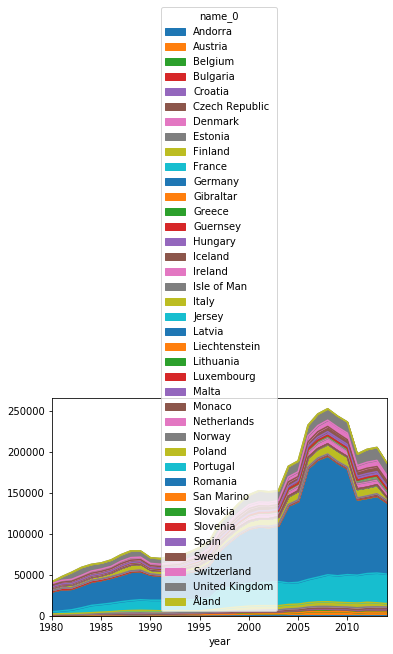

In [33]:
txt[txt['name_0'].isin(eur)].pivot_table(index='year',columns='name_0',aggfunc='size').plot(kind='area')

From the above, it looks like Germany and France account for sizeable pluralities of patents. We'll keep including the UK too, though-- because of that whole Special Relationship.

## Reduce whole dataset to 12 groups of countries, to make visualization cleaner/ colorbrewer-friendly

In [59]:
west_eur_ne = ['Andorra','Austria','Belgium','Denmark','Finland','Greece','Iceland','Ireland','Isle of Man',\
           'Jersey','Liechtenstein','Luxembourg','Malta','Monaco','Norway','Portugal','Åland','Switzerland',\
           'San Marino','Gibraltar','Guernsey','Netherlands','Sweden','Spain','Italy','Turkey','Israel']
east_eur_ru = ['Bulgaria','Croatia','Czech Republic','Estonia','Hungary','Latvia','Lithuania','Poland','Romania',\
           'Slovakia','Slovenia','Russia']
lat_am_sa = ['Brazil','Chile','Mexico','South Africa']
aus_nz_ca = ['Australia','New Zealand','Canada']

txt['ctry_group'] = np.where(txt['name_0'].isin(west_eur_ne),'Other W Europe and Near East',\
                             np.where(txt['name_0'].isin(east_eur_ru),'Russia and E Europe',\
                                      np.where(txt['name_0'].isin(lat_am_sa),'Latin America and Africa',\
                                            np.where(txt['name_0'].isin(aus_nz_ca),'Australia-NZ-Canada',txt['name_0']))))

In [60]:
txt[txt['year']<='2012'].pivot_table(index='year',columns='ctry_group',aggfunc='size')

ctry_group,Australia-NZ-Canada,China,France,Germany,India,Japan,Latin America and Africa,Other W Europe and Near East,Russia and E Europe,South Korea,United Kingdom,United States
year,,,,,,,,,,,,
1980,2156,27,2713,24769,22,221884,215,10404,1930,47,1974,62266
1981,2361,44,3604,26064,58,256978,275,11861,1908,185,4564,61441
1982,2411,57,4483,25401,43,277359,317,12887,1997,673,8611,62854
1983,2615,59,6534,27197,63,295053,284,13834,2120,849,9710,61751
1984,3020,72,8921,28809,69,329585,275,15131,2136,594,8176,65740
1985,3087,3572,9544,29514,81,350210,308,16169,2145,323,7571,70397
1986,3519,3029,10321,30950,118,364051,346,17935,1435,394,7966,74382
1987,4080,3568,11110,32521,76,384506,359,21878,1582,499,7947,82706
1988,4271,4115,12165,34769,73,381127,445,22628,1948,652,8273,93032


In [ ]:
txt_12 = txt[txt['year']<='2012']

In [63]:
piv_12 = txt_12.pivot_table(index='year',columns='ctry_group',aggfunc='size')

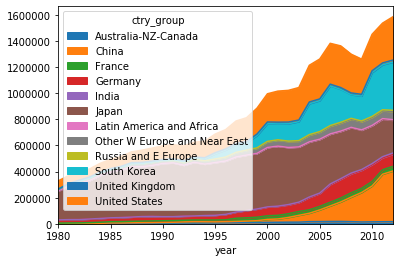

In [64]:
piv_12.plot(kind='area')

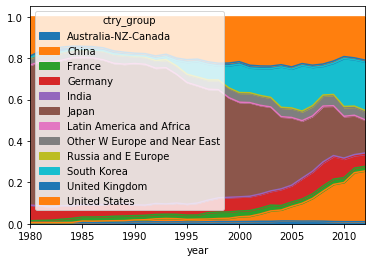

In [65]:
piv_12.div(piv_12.sum(axis=1),axis=0).plot(kind='area')

## Now drill down into US

In [52]:
us = txt[(txt['name_0'] == 'United States')&(txt['year']<='2012')]

## Whittle Down to (Somewhat Arbitrary) State Groups

In [69]:
neng = ['Maine','Vermont','New Hampshire','Massachusetts','Rhode Island','Connecticut']
mid_at = ['New Jersey','Pennsylvania','Delaware','Maryland','District of Columbia']
g_lakes = ['Ohio','Indiana','Illinois','Michigan','Wisconsin','Minnesota','Missouri']
plains = ['South Dakota','North Dakota','Nebraska','Iowa','Kansas','Oklahoma']
other_pac = ['Oregon','Alaska','Hawaii']
sw_mtn = ['Nevada','Utah','Colorado','Arizona','New Mexico','Idaho','Montana','Wyoming']
south = ['Virginia','North Carolina','South Carolina','Georgia','Florida','Alabama','Mississippi','Arkansas',\
             'Tennessee','Kentucky','West Virginia','Louisiana']

In [70]:
us['st_group'] = np.where(us['name_1'].isin(neng),'New England',\
                    np.where(us['name_1'].isin(mid_at),'Mid-Atlantic',\
                        np.where(us['name_1'].isin(g_lakes),'Great Lakes and Missouri',\
                            np.where(us['name_1'].isin(plains),'Plains',
                                np.where(us['name_1'].isin(other_pac),'Other Pacific',
                                    np.where(us['name_1'].isin(sw_mtn),'Southwest and Mountain',
                                         np.where(us['name_1'].isin(south),'South',us['name_1'])))))))

/Users/aseemshukla/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [73]:
us_piv = us.pivot_table(index='year',columns='st_group',aggfunc='size')

In [74]:
us_piv

st_group,California,Great Lakes and Missouri,Mid-Atlantic,New England,New York,Other Pacific,Plains,South,Southwest and Mountain,Texas,Washington
year,,,,,,,,,,,
1980,8544,14837,10462,5228,5434,564,2101,8033,2615,3423,1025
1981,8460,14033,10376,5403,5377,588,2083,7891,2637,3565,1028
1982,8570,14519,10665,5286,5365,613,2318,7999,2704,3832,983
1983,8714,13921,10103,5410,5434,605,2179,7915,2754,3700,1016
1984,9735,14681,10651,5810,5528,746,2346,8122,2894,4158,1069
1985,10516,15769,11423,6122,5944,817,2322,9092,3035,4110,1247
1986,11458,16828,11485,6399,6312,1055,2354,9396,3238,4400,1457
1987,12876,18285,12428,7397,6764,1061,2408,11188,3684,5024,1591
1988,14345,20858,13310,8233,7915,1127,2499,12707,4369,5803,1866


## Surprise-- California is the Largest Single Patent Generator

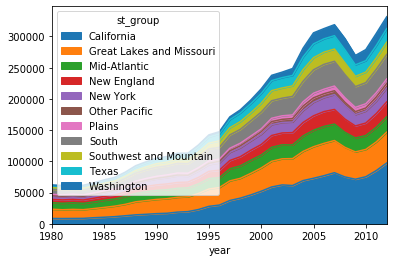

In [75]:
us_piv.plot(kind='area')

## California's dominance has increased over time

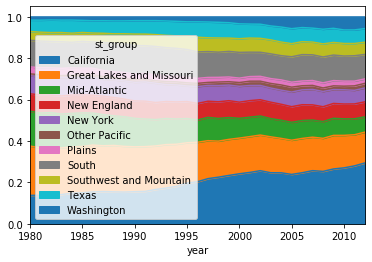

In [76]:
us_piv.div(us_piv.sum(axis=1),axis=0).plot(kind='area')

## Save the Pivots as CSVs for use in D3

In [77]:
us_piv.to_csv('us.csv')
us_piv.div(us_piv.sum(axis=1),axis=0).to_csv('src/data/us_share.csv')

piv_12.to_csv('world.csv')
piv_12.div(piv_12.sum(axis=1),axis=0).to_csv('src/data/world_share.csv')